In [49]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [50]:
#reading the data
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
# calling first 5 line
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
#checks whether the objects of a Dataframe contain missing or null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
# quick description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [55]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [56]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [57]:
#viewing basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


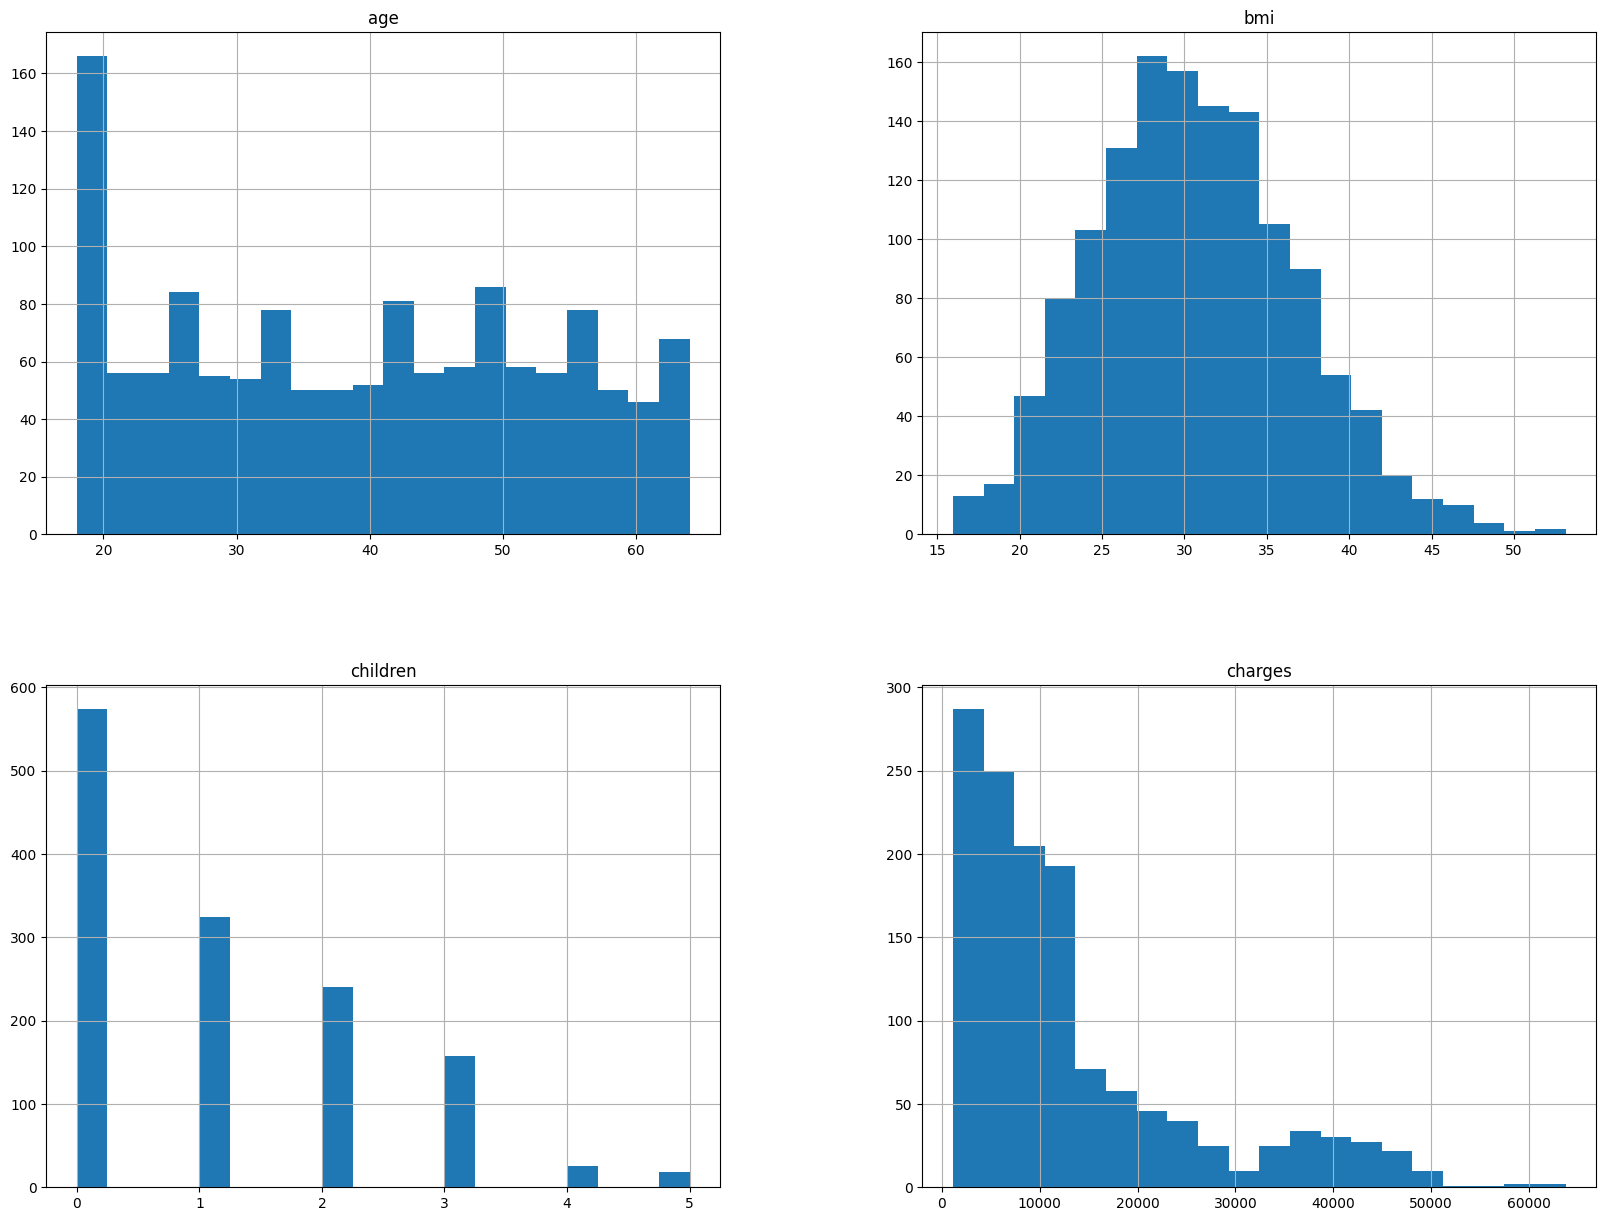

In [58]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [59]:
# prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


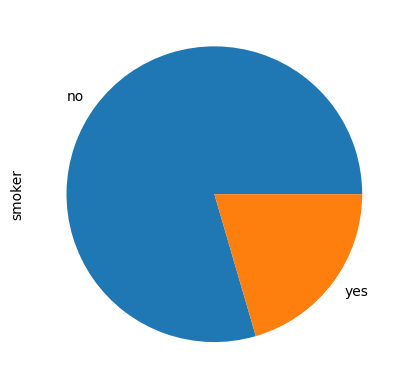

In [60]:
df['smoker'].value_counts().plot.pie();

<Axes: >

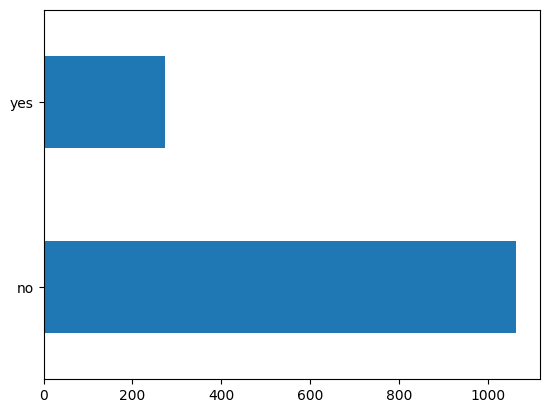

In [61]:
df['smoker'].value_counts().plot.barh()

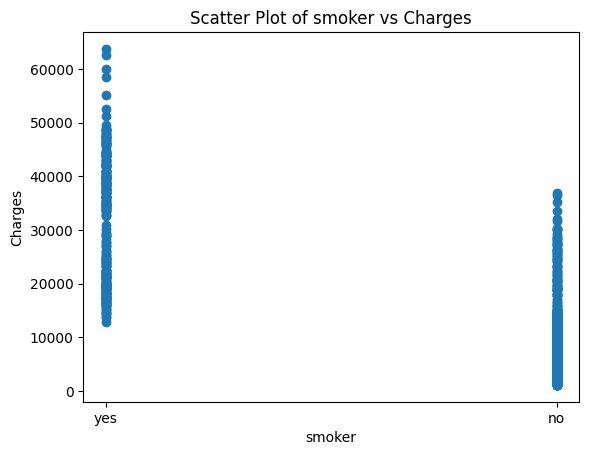

In [62]:
plt.scatter(df["smoker"],df["charges"])
plt.xlabel("smoker")
plt.ylabel("Charges")
plt.title("Scatter Plot of smoker vs Charges");


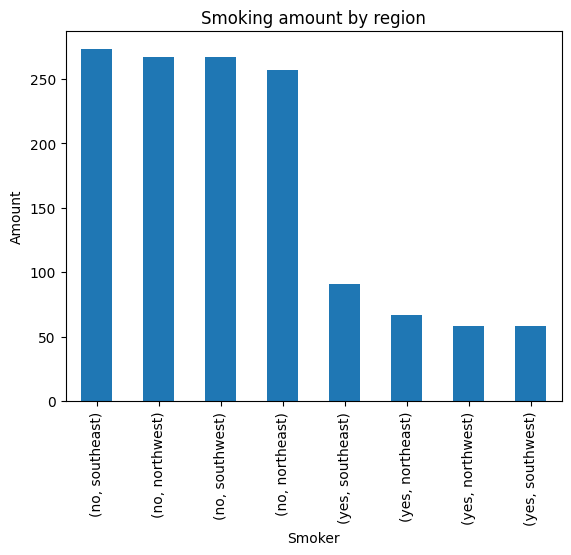

In [63]:
smoker_region=df.groupby("smoker")["region"].value_counts()
smoker_region.plot(kind="bar")
plt.xlabel("Smoker")
plt.ylabel("Amount")
plt.title("Smoking amount by region");

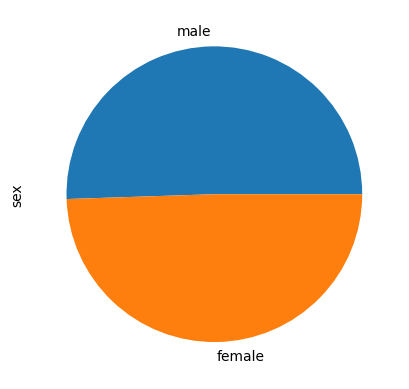

In [64]:
df['sex'].value_counts().plot.pie();

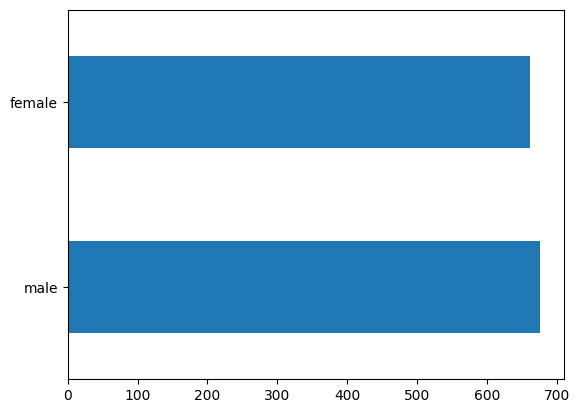

In [65]:
df['sex'].value_counts().plot.barh();

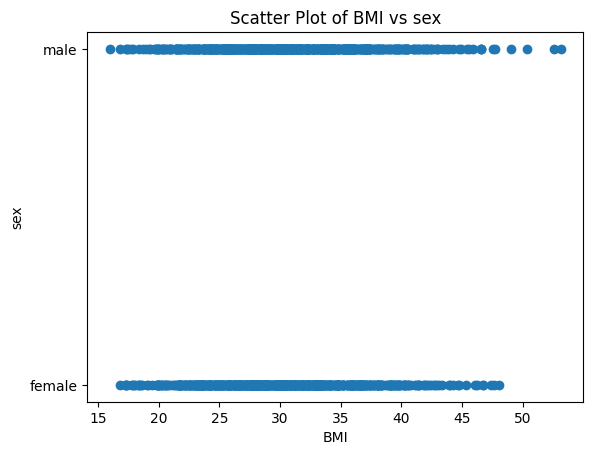

In [66]:
plt.scatter(df["bmi"],df["sex"])
plt.xlabel("BMI")
plt.ylabel("sex")
plt.title("Scatter Plot of BMI vs sex");

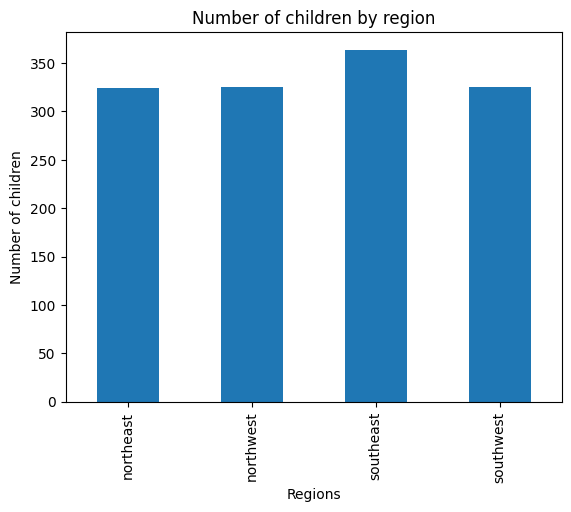

In [67]:
region_children=df.groupby("region")["children"].count()
region_children.plot(kind="bar")
plt.xlabel("Regions")
plt.ylabel("Number of children")
plt.title("Number of children by region");

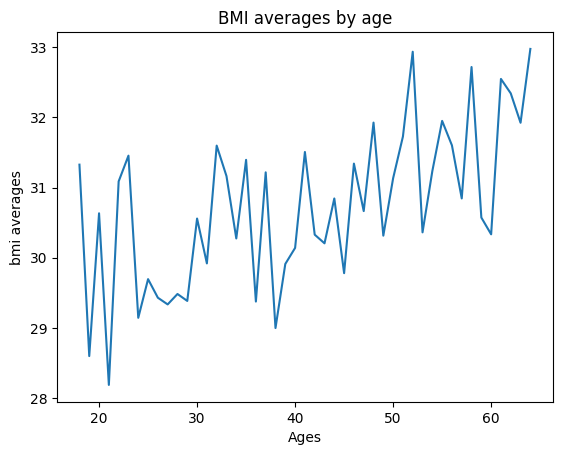

In [68]:
age_bmi=df.groupby("age")["bmi"].mean()
plt.plot(age_bmi.index,age_bmi.values)
plt.xlabel("Ages")
plt.ylabel("bmi averages")
plt.title("BMI averages by age");

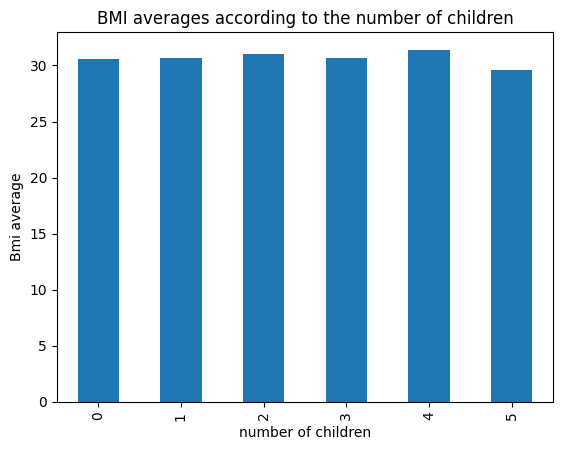

In [69]:
children_bmi= df.groupby("children")["bmi"].mean()
children_bmi.plot(kind ="bar")
plt.xlabel("number of children")
plt.ylabel("Bmi average")
plt.title("BMI averages according to the number of children");

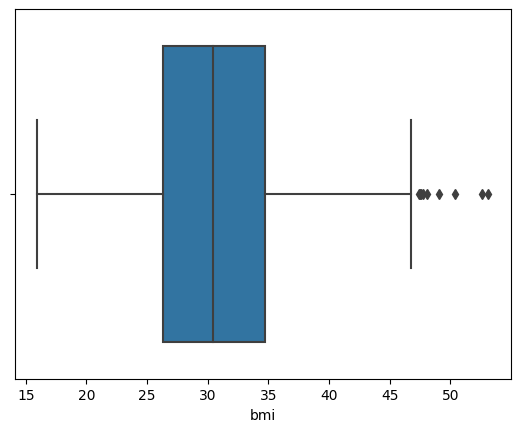

In [70]:
# a measure of how well distributed the data in a data set is, and to see the outliers
import seaborn as sns
sns.boxplot(x="bmi", data=df);

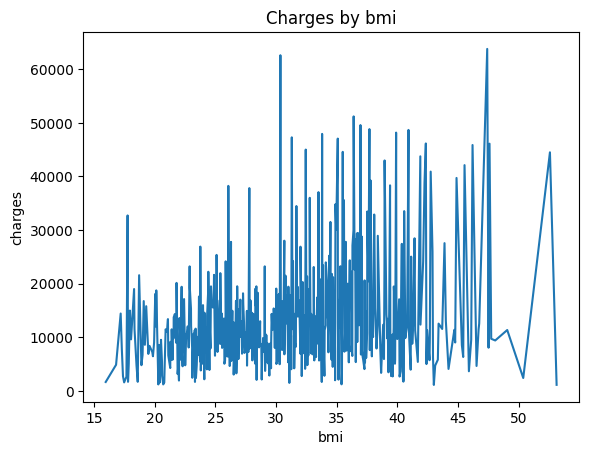

In [71]:
charges_bmi=df.groupby("bmi")["charges"].mean()
plt.plot(charges_bmi.index,charges_bmi.values)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("Charges by bmi");

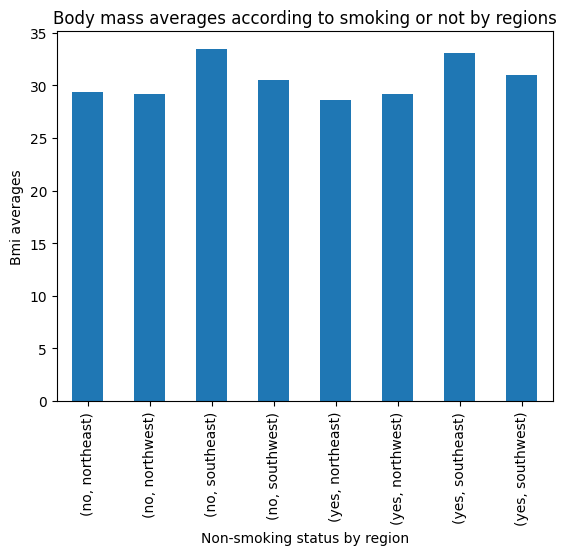

In [72]:
smoker_region_bmi=df.groupby(["smoker","region"])["bmi"].mean()
smoker_region_bmi.plot(kind="bar")
plt.xlabel("Non-smoking status by region")
plt.ylabel("Bmi averages")
plt.title("Body mass averages according to smoking or not by regions");


In [73]:
num_col = [col for col in df.columns if df[col].dtype != 'O' ]
num_but_cat = [col for col in df.columns if df[col].dtype != 'O' and df[col].nunique()<10]
num_col = [col for col in num_col if col != 'output']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols = cat_cols + num_but_cat
df['charges'].head()
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [74]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [75]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
cat_cols


['sex', 'smoker', 'region', 'children']

In [77]:
num_but_cat

['children']

In [78]:
num_col

['age', 'bmi', 'children', 'charges']

In [79]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [80]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [81]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [82]:
# replace_with_thresholds(df,"charges")

In [83]:
# scaler = StandardScaler()
# df[num_col] = scaler.fit_transform(df[num_col])
# df[num_col].head()

In [84]:
# le = LabelEncoder()
# le.fit_transform(df["charges"])[0:5]
df = pd.get_dummies(df, columns=['smoker'], prefix=['smoker'])
df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])

In [85]:
y = df["charges"]
X = df.drop(["charges","region"],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)
# y_train_pred = model.predict(X_train_scaled)
# y_test_pred = model.predict(X_test_scaled)

In [87]:
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)

# print("Eğitim Kümesi Ortalama Karesel Hata:", train_mse)
# print("Test Kümesi Ortalama Karesel Hata:", test_mse)

In [88]:
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_test_pred)
# r2_train = r2_score(y_train, y_train_pred)
# print("R-kare-train (R-squared):", r2_train)
# print("R-kare (R-squared):", r2)

In [89]:
df.head()


,age,bmi,children,region,charges,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,southwest,16884.92400,0,1,1,0
1,18,33.770,1,southeast,1725.55230,1,0,0,1
2,28,33.000,3,southeast,4449.46200,1,0,0,1
3,33,22.705,0,northwest,21984.47061,1,0,0,1
4,32,28.880,0,northwest,3866.85520,1,0,0,1


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
5%         18.000000
10%        19.000000
20%        24.000000
30%        29.000000
40%        34.000000
50%        39.000000
60%        44.000000
70%        49.000000
80%        54.000000
90%        59.000000
95%        62.000000
99%        64.000000
max        64.000000
Name: age, dtype: float64


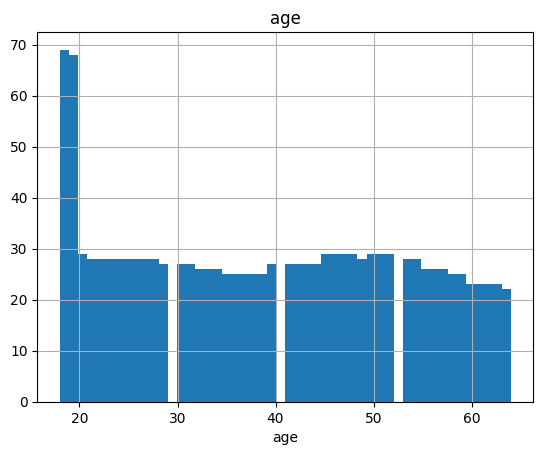

#####################################
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
5%         21.256000
10%        22.990000
20%        25.326000
30%        27.360000
40%        28.797000
50%        30.400000
60%        32.032000
70%        33.660000
80%        35.860000
90%        38.619500
95%        41.106000
99%        46.407900
max        53.130000
Name: bmi, dtype: float64


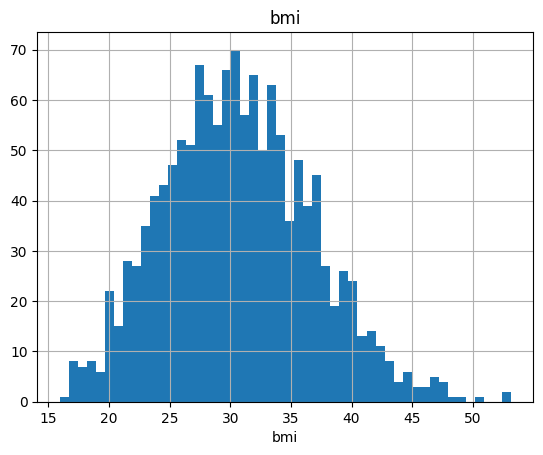

#####################################
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         1.000000
60%         1.000000
70%         2.000000
80%         2.000000
90%         3.000000
95%         3.000000
99%         5.000000
max         5.000000
Name: children, dtype: float64


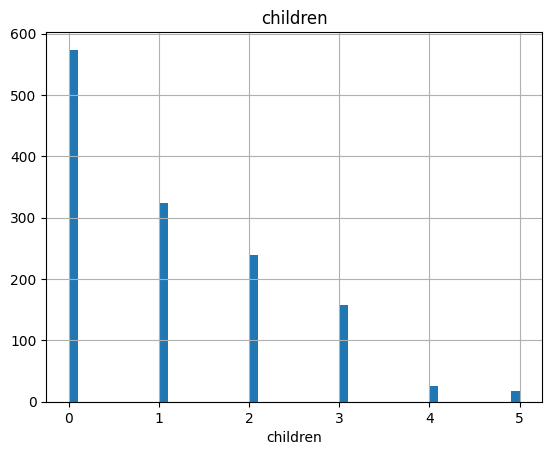

#####################################
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
5%        1757.753400
10%       2346.533615
20%       3991.575720
30%       5484.846770
40%       7369.052730
50%       9382.033000
60%      11399.857160
70%      13767.875345
80%      20260.626406
90%      34831.719700
95%      41181.827787
99%      48537.480726
max      63770.428010
Name: charges, dtype: float64


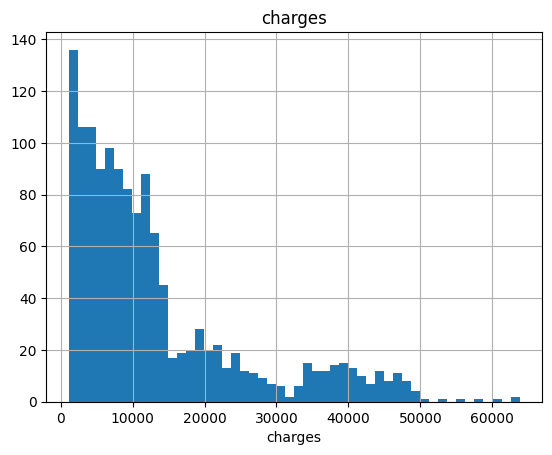

#####################################


In [90]:
def num_summary(dataframe, num_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        dataframe[num_col].hist(bins=50)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show()

    print("#####################################")


for col in num_col:
    num_summary(df, col, True)

In [91]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [92]:
for col in num_col:
  print(f"{col} : {check_outlier(df,col)}")


age : False
bmi : True
children : False
charges : True


In [93]:
#MODEL İŞLEMİ

y = np.log1p(df['charges'])
X = df.drop(["charges", "region"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]


In [94]:
df['charges'].mean()
df['charges'].std()

12110.011236694001

In [95]:
lgbm_model = LGBMRegressor(random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))


lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               #"colsample_bytree": [0.5, 0.7, 1]
             }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)



final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

lgbm_tuned = LGBMRegressor(**lgbm_gs_best.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)


# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

np.sqrt(mean_squared_error(new_y_test, new_y))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 7
[LightGBM] [Info] Start training from score 9.098574
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 7
[LightGBM] [Info] Start training from score 9.098795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not en

3976.8762341310853

In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(new_y, new_y_test)
print("R-kare (R-squared):", r2)

R-kare (R-squared): 0.8510568253268813
